![EX20MDT3GPA%20%201440%20X%20120@96x-100.jpg](attachment:EX20MDT3GPA%20%201440%20X%20120@96x-100.jpg)

# Introducción al Machine Learning - Semana 2
## Caso: Modelos lineales para regresión, muestreo y selección del mejor modelo

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos lineales de componentes principales, partial least squares y regularización.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos]

Estimación del modelo usando componentes principales: Se estima el modelo usando componentes principales, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación del modelo usando PCA y el método forward: Se estima el modelo usando el método forward con componentes principales, se responde si es el mismo modelo del punto 2, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [30 puntos]

Estimación del modelo de partial least squares: Se estima el modelo usando partial least squares, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación de un modelo de penalización: Se estima algún modelo de penalización, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [15 puntos]

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [5 puntos]


### Datos

Existe gran variedad de bases de datos reales disponibles en internet usadas por la comunidad académica para la evaluación de modelos predictivos.

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Hitters", la cual contiene 20 variables de jugadores de la Major League Baseball en las temporadas de 1986 y 1987. De esta manera, el objetivo de la actividad es predecir el salario de un jugador basado en las características que describen las variables predictivas.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://drive.google.com/drive/folders/1YuWR657GDARSMPkUCVFNd2a5mX5zL16A?usp=sharing

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [3]:
df_hitters = pd.read_csv("Hitters.csv")
df_hitters = df_hitters.drop(columns = ['League', 'Division', 'NewLeague'])
df_hitters.drop(columns=df_hitters.columns[0], inplace=True)  ### Eliminación columna Categorica de bateadores
df_hitters = df_hitters.dropna(subset=["Salary"]) ### Eliminación de registros NA en columna Salario

XTotal = df_hitters.drop(columns=["Salary"])  ### Definicion de variables predictoras
yTotal = df_hitters["Salary"]   ### Definicion de Variable objetivo
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0) ### Definición de datos de entrenamiento y de prueba
df_xtrain = pd.DataFrame(XTrain) ### Dataframe con datos de entrenamiento para análisis preliminar
df_ytrain = pd.DataFrame(yTrain) ### Dataframe con datos de variable de respuesta

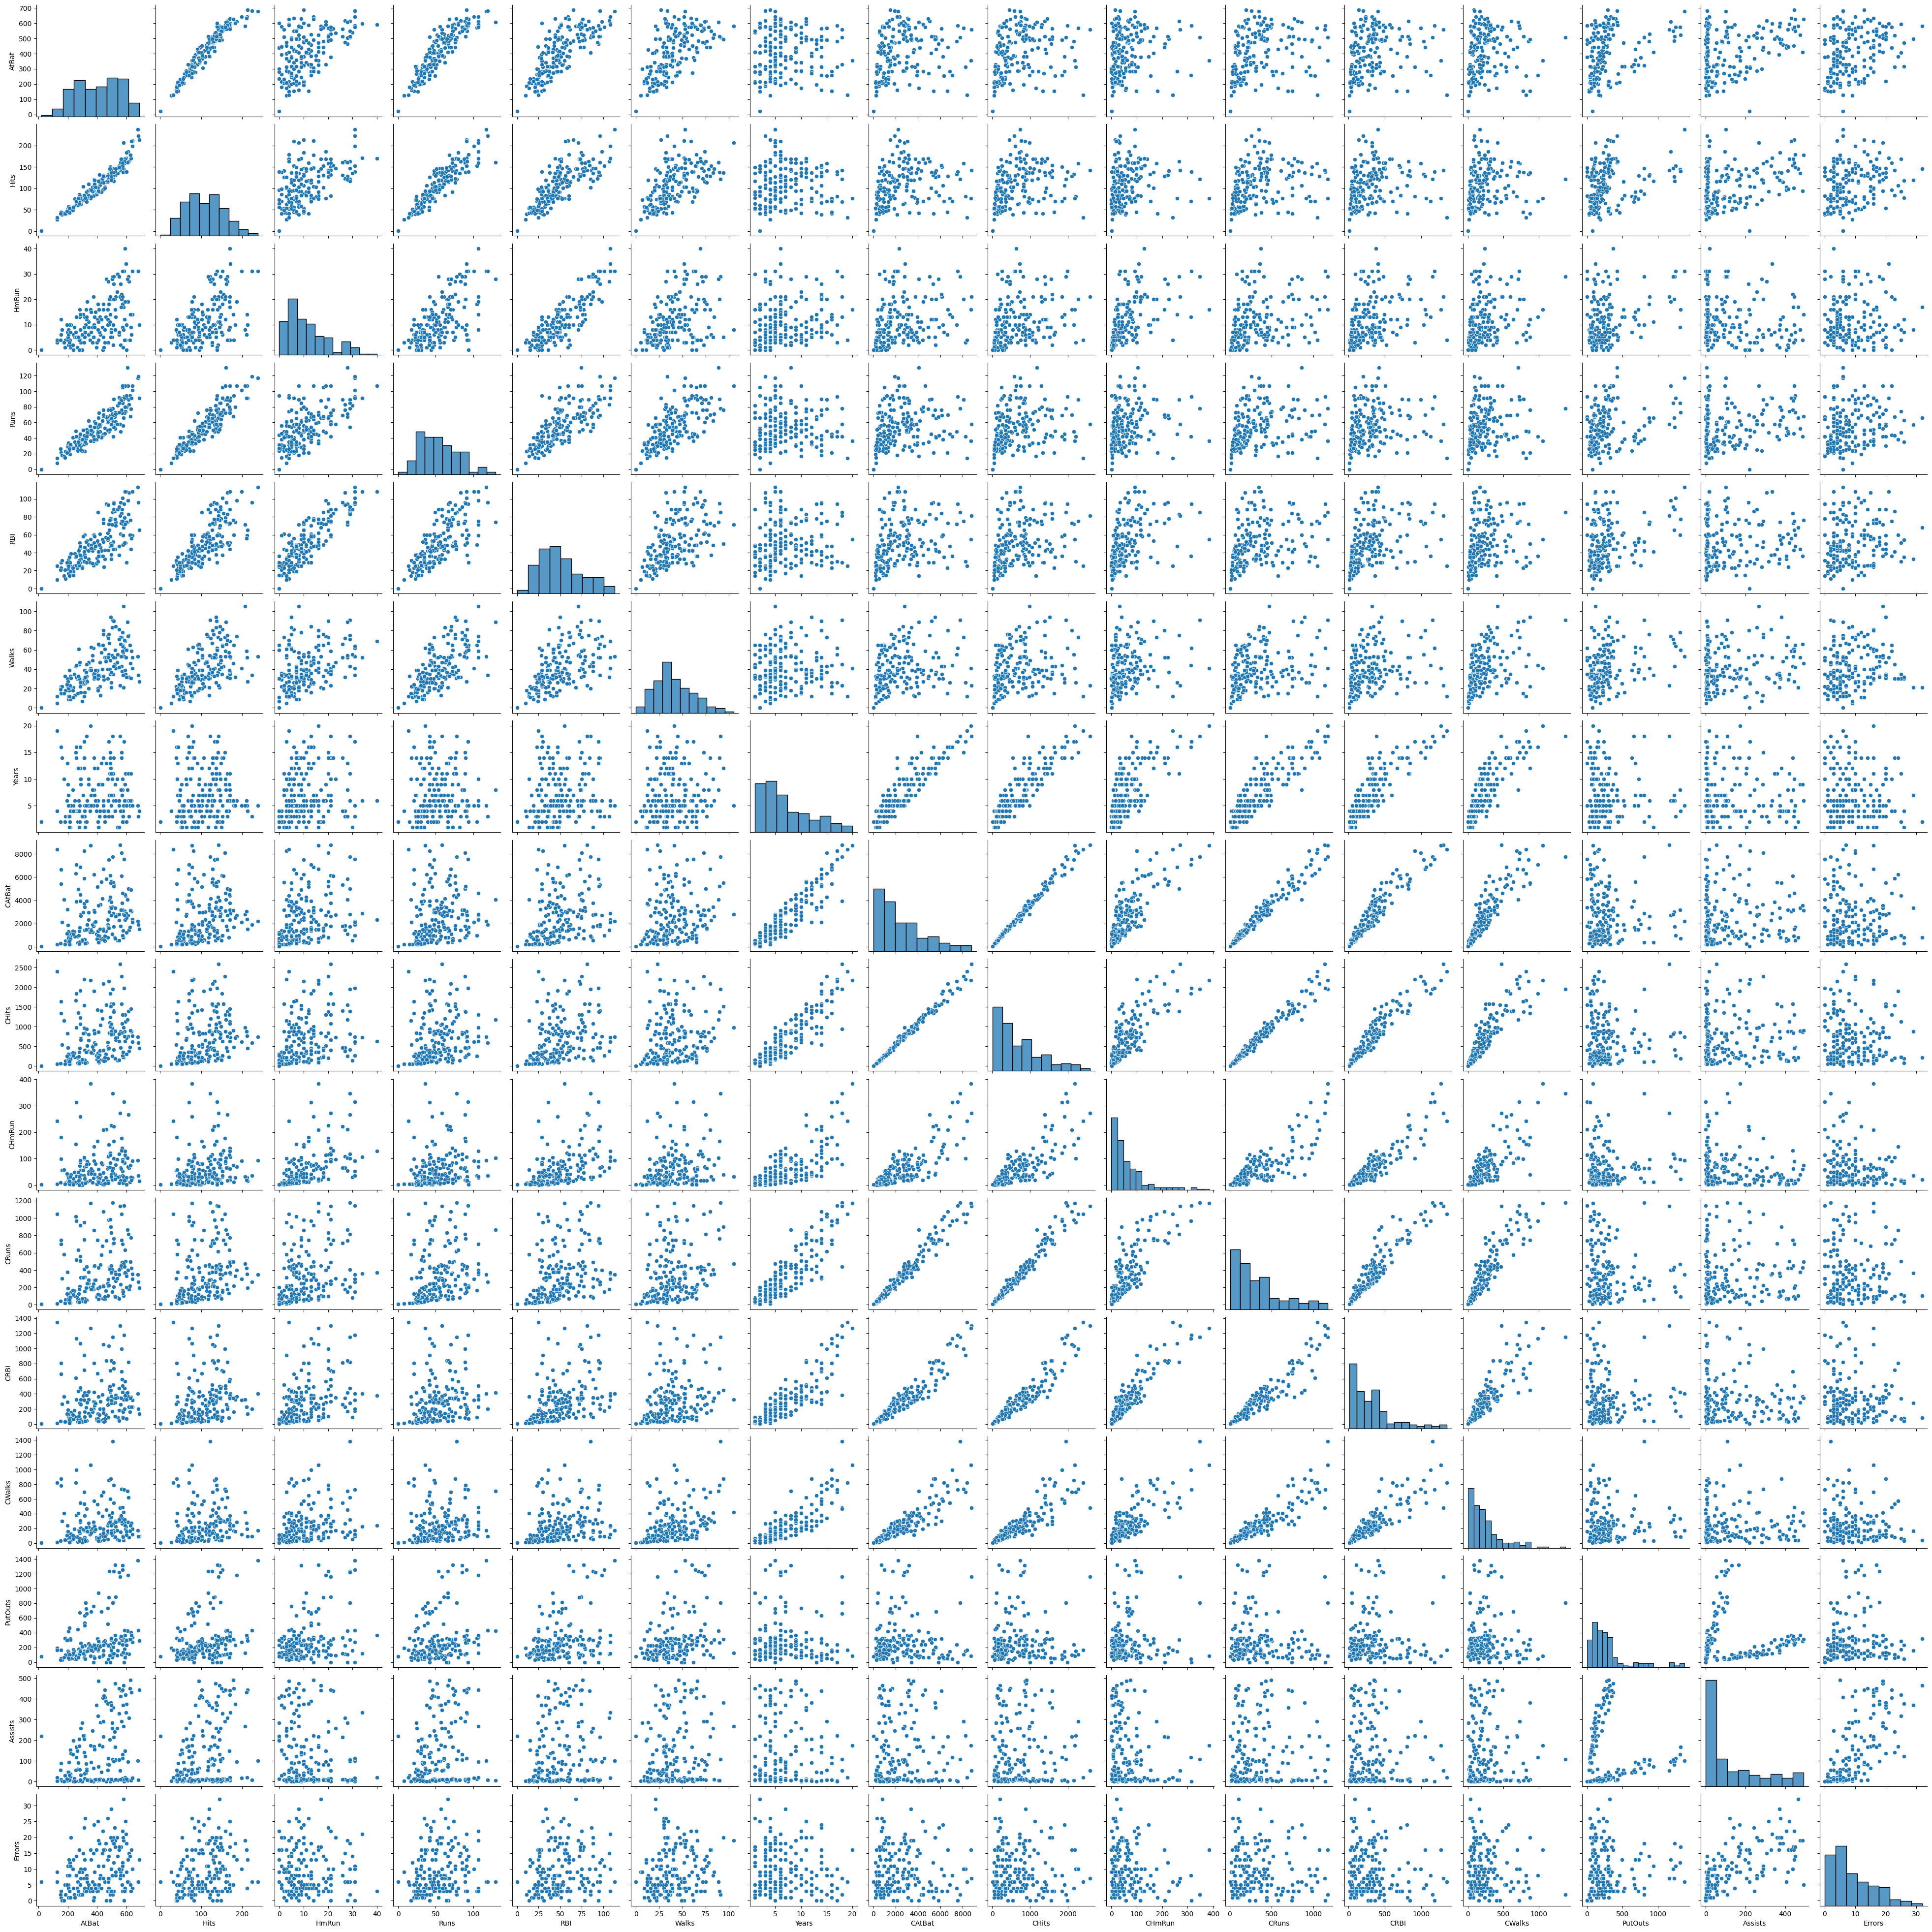

In [ ]:
### Correlogramas de variables predictoras
sns.pairplot(df_xtrain, kind="scatter")
plt.show()

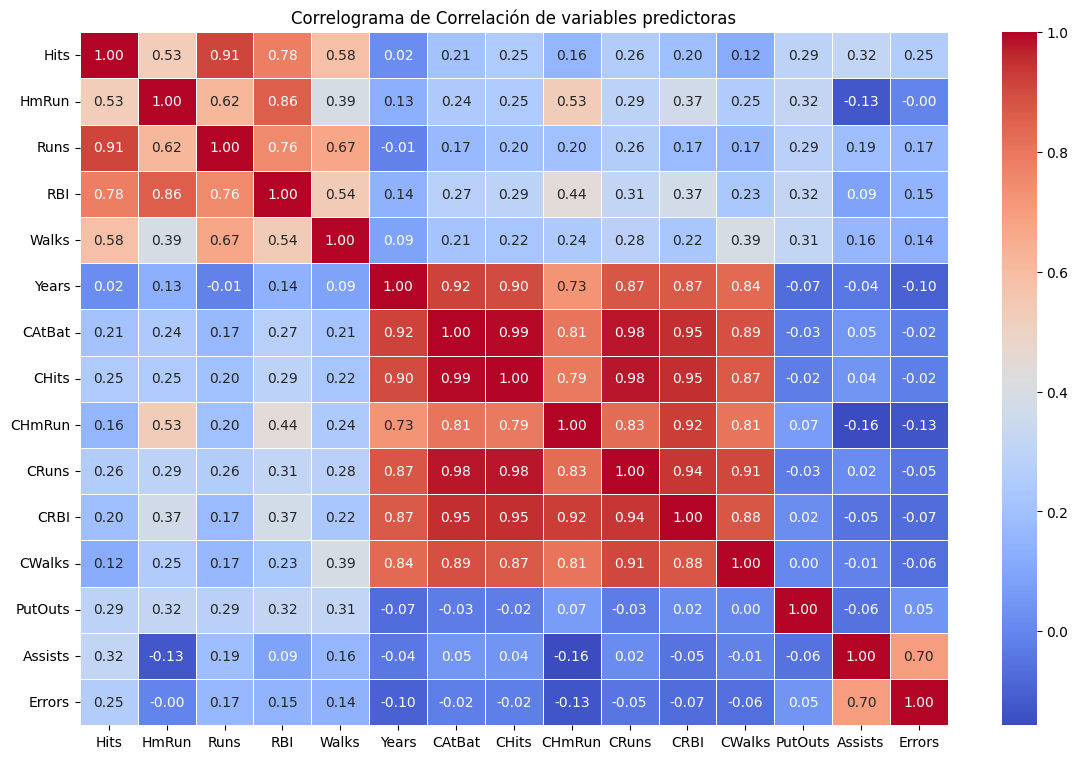

In [4]:
# Mapa de calor de correlaciones entre variables predictoras
df_xtrain = pd.DataFrame(XTrain)
correlation_matrix = df_xtrain.iloc[:, 1:].corr()

plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlograma de Correlación de variables predictoras")
plt.show()

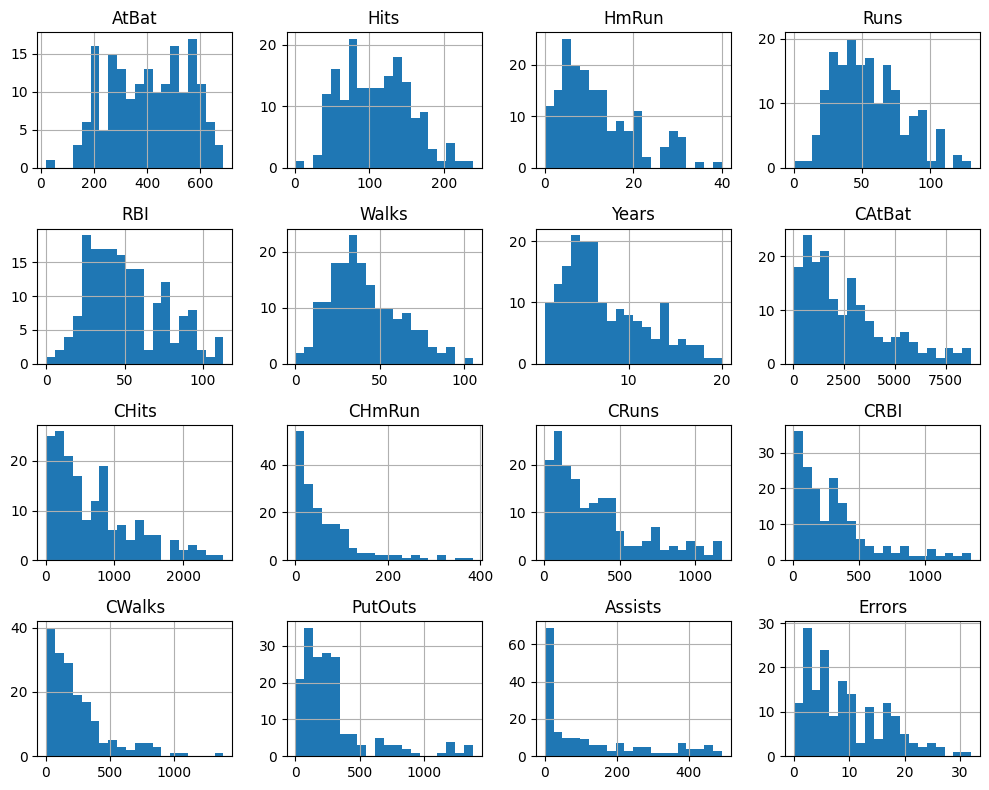

In [5]:
### Histograma de variables predictoras
df_xtrain.hist(bins=20, figsize=(10, 8))

plt.tight_layout()  # asegurarse de que las subgráficas no se solapen
plt.show()

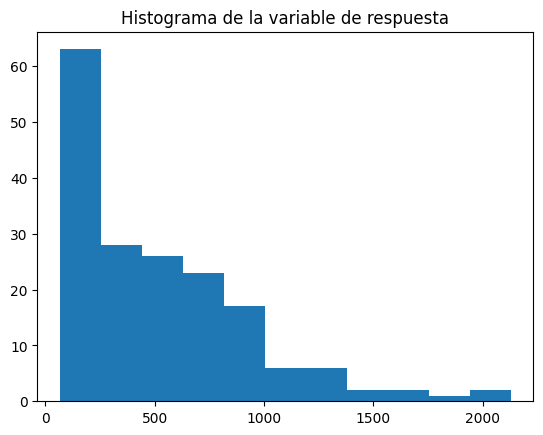

In [6]:
### Histograma de variable de respuesta
plt.hist(yTrain, bins='auto')
plt.title('Histograma de la variable de respuesta')
plt.show()

In [7]:
### Estadisticas descriptivas de variables predictoras
print(df_xtrain.describe())

            AtBat        Hits       HmRun        Runs        RBI       Walks  \
count  176.000000  176.000000  176.000000  176.000000  176.00000  176.000000   
mean   406.602273  108.579545   11.375000   54.909091   50.81250   41.028409   
std    146.146231   45.509741    8.573464   25.156487   24.42631   20.751710   
min     20.000000    1.000000    0.000000    0.000000    0.00000    0.000000   
25%    283.000000   73.750000    5.000000   35.000000   31.00000   26.000000   
50%    410.500000  105.000000    9.000000   51.000000   47.00000   37.000000   
75%    523.750000  141.000000   16.000000   71.250000   70.25000   53.250000   
max    687.000000  238.000000   40.000000  130.000000  113.00000  105.000000   

            Years       CAtBat        CHits      CHmRun        CRuns  \
count  176.000000   176.000000   176.000000  176.000000   176.000000   
mean     7.210227  2597.630682   702.556818   63.750000   345.670455   
std      4.613782  2100.943199   584.741620   71.244729   293.3

In [8]:
### Estadisticas descriptivas de variable de respuesta
print(df_ytrain.describe())

            Salary
count   176.000000
mean    520.005545
std     412.074902
min      67.500000
25%     194.000000
50%     420.833500
75%     750.000000
max    2127.333000


**Procedimiento,  análisis y conclusiones sobre el punto 1**

El desarrollo del punto 1 inicia con la lectura y codificacion del archivo CSV.
Se carga un DataFrame de pandas para su posterior manipulacion y limpieza. Se eliminan las columnas *League, Division* y *NewLeague* ya que son variabales categóricas y no aportarán valor a las predicciones en los modelos. Posteriormente a esto se eliminan las filas con valores nulos en la columna *Salary*, para evitar posibles sesgos en el analisis.

Investigamos el significado de las variables y encontramos que muchas reflejan el desempeño en 1986 y a lo largo de la carrera del jugador. La variable objetivo, *Salary*, representa el salario en opening day de 1987 en miles de dólares.

A continuacion, se procede a analizar las correlaciones entre las variables numéricas mediante una **matriz de dispersión** y se complementa con una **matriz de correlación**. Los valores de la matriz de correlación se visualizan en un mapa de calor y indicando una correlación positiva o negativa (rojo y azul respectivamente). Este análisis muestra que las variables *catbat, chits, chmrun, cruns, crbi* y *cwalks* tienen una fuerte relación con *Salary*, lo que indica que el desempeño acumulado influye en el salario. Además, éstas métricas están altamente correlacionadas entre sí, lo que se refleja en el correlograma con una sección muy marcada en rojo.

Luego de esto se generan **estadisticas descriptivas** y se graficaron **histogramas** para evaluar la distribución de las variables, que si bien también se encuentran en la matriz de dispersión graficada previamente, esta segunda visualización permite observarlo con mayor claridad. De aquí se detectan las diferentes escalas que tienen las variables, algunas con promedios de 7 (por ejemplo *years*) y otras con promedios de 2652 (*CAtBat*) lo cual indica la necesidad de estandarizar las escalas.


### 2. Estimación del modelo usando componentes principales (20 puntos)
Estimen un modelo predictivo usando la muestra de entrenamiento usando componentes principales y evalúen su desempeño en la muestra de test.

2.1 Estandarizar los valores de X de entrenamiento

In [9]:
# crear el objeto
scaler = StandardScaler()
# ajustar el objeto
scaler.fit(XTrain)
# transform, predict or measure (transform en este caso)
XEscaladoTrain=scaler.transform(XTrain)

2.2 Obtener la matriz A que aplica la transformación lineal sobre X para obtener Z

In [10]:
p = len(XEscaladoTrain[0]) # cantidad de variables

# crear el objeto
pca = PCA(n_components=p)
# ajustar el objeto
pca.fit(XEscaladoTrain)
# obtener A
A = pca.components_

2.3 Graficar la varianza explicada por los componentes para saber cuántos elegir

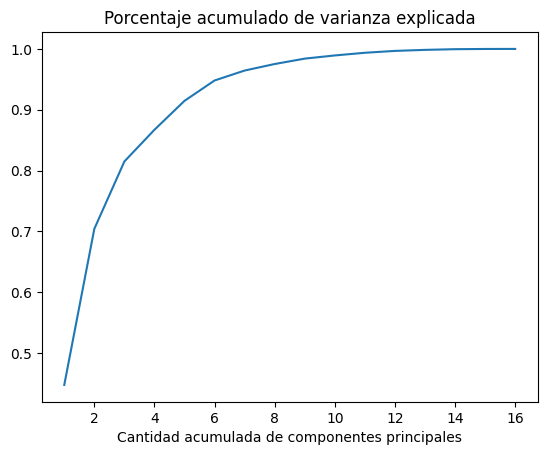

In [11]:
# para ver cuantos componentes principales elijo

# graficar para poder ver cuántos componentes explican la mayor parte de la varianza de las X
porcentajeVarianzaExplicada=pca.explained_variance_ratio_
plt.plot(range(1,p+1),np.cumsum(porcentajeVarianzaExplicada))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()
# elegire 8

2.4 Obtener los componentes principales

In [12]:
nComponentesElegidas=8

# se hace una multiplicación de matrices, recordando que Z = X*A
# nota: se hace sobre los datos de entrenamiento escalados
# matmul es la funcion de numpy que permite multiplicar matrices
ZTotalTrain=np.matmul(XEscaladoTrain,A)

# se seleccionan unicamente la cantidad de variables Z que explican el +90% de la variabilidad
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

2.5 Ajustar el modelo con los componentes elegidos

In [13]:
# crear el objeto
regPCA = LinearRegression()

# ajustar el objeto
regPCA.fit(ZTrain, yTrain)

LinearRegression()

2.6 Previo a predicción: escalar los valores X de test y aplicarles la transformación y seleccionar los 8 componentes

In [14]:
XEscaladoTest=scaler.transform(XTest)

# se multiplica por A para obtener Z
ZTotalTest=np.matmul(XEscaladoTest,A)

# se seleccionan unicamente las primeras 8
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

2.7 Predicción y cálculo de MSE

In [15]:
prediccionPCA=regPCA.predict(ZTest)
MSEPCA=np.average(np.square(prediccionPCA-yTest))
print('MSE regresión por componentes principales:')
print(MSEPCA)

mse1 = MSEPCA

MSE regresión por componentes principales:
137189.05884786753


El procedimiento que seguimos para desarrollar el modelo de regresión usando PCA para transformar las variables de entrada X previo al ajuste del modelo es el siguiente:
1. Primero se dividieron los datos en entrenamiento y test para evitar el overfit en el modelo
2. Los siguientes pasos se aplican sobre los datos de entrenamiento:
  *   Estandarizar la escala de X
  *   Usar scikit learn para obtener el objeto de PCA (ajustado con los datos de XTrain)
  *   Obtener la matriz A con la que se creará una combinación lineal de X
  *   Obtener y graficar la varianza explicada por los componentes
  *   Seleccionar la cantidad de componentes
  *   Multiplicar la matriz A con la matriz X para obtener Z
  *   Filtrar únicamente la cantidad de Z elegidos
  *   Entrenar el modelo de regresión con Z elegidos (Ztrain) y Ytrain

2.   Los siguientes pasos se aplican sobre los datos de test:
  * Estandarizar la escala de X
  * Transformar X al multiplicar por A para obtener Z (la misma A que se obtuvo con los datos de entrenamiento sin volver a ajustar)
  * Filtrar únicamente la cantidad de Z elegidos (Ztest)
  * Predecir usando Ztest
  * Comparar predicciones contra Ytest y obtener MSE

**Análisis y conclusiones:**

Tomando en cuenta que el objetivo de aplicar una transformación de variables con PCA es reducir la dimensionalidad del modelo, obteniendo variables que no sean redundantes entre sí y poder tener la información concentrada en pocas variables, llegamos a la conclusión que la implementación de esta técnica fue exitosa en ese sentido, pues originalmente se tenían 16 variables y terminamos eligiendo 8 nuevas variables (componentes principales) es decir, reducimos la dimensionalidad en un 50%. Las 8 componentes principales que se eligeron, explican más del 90% de la varianza, por lo que se logra obtener la misma información en la mitad de las variables.



### 3. Estimación del modelo usando PCA y el método forward (30 puntos)
Ahora construyan su propio algoritmo para hacer una regresión por componentes principales, en donde primero calculen los componentes y después realicen un proceso de selección de variables secuencial (forward) que permita encontrar el mejor modelo. Todo lo anterior en la muestra de entrenamiento.

Finalmente, evalúen el desempeño en test.

Una vez hecho este procedimiento respondan a la siguiente pregunta:

¿Es el mismo modelo del punto anterior (punto 2)?

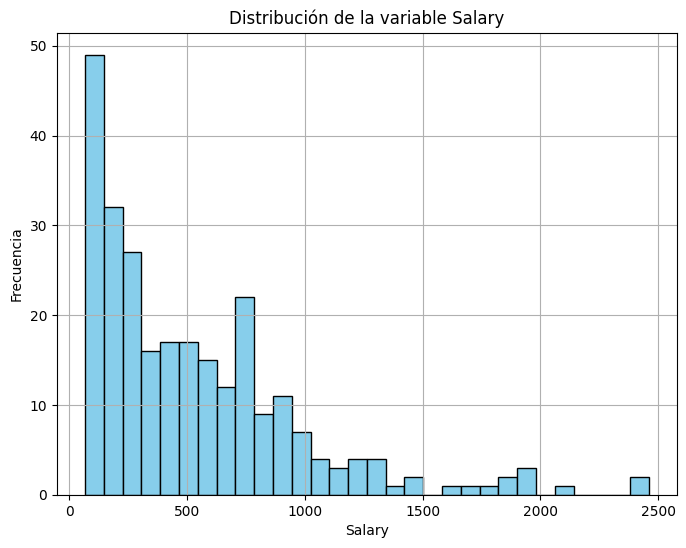

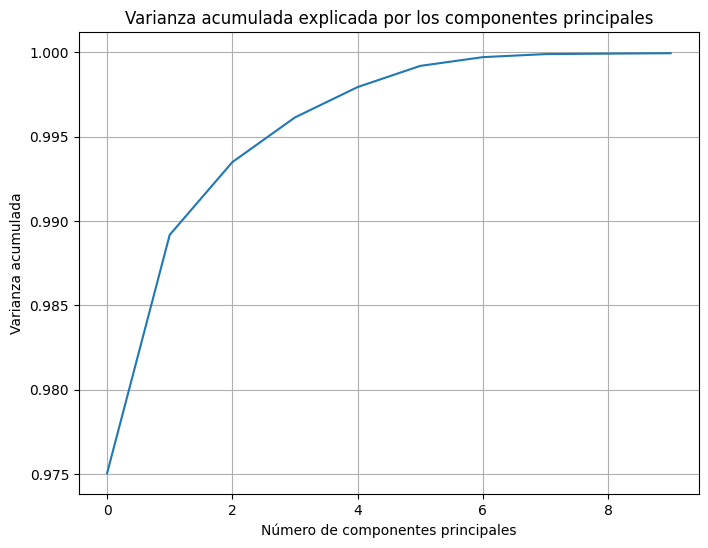

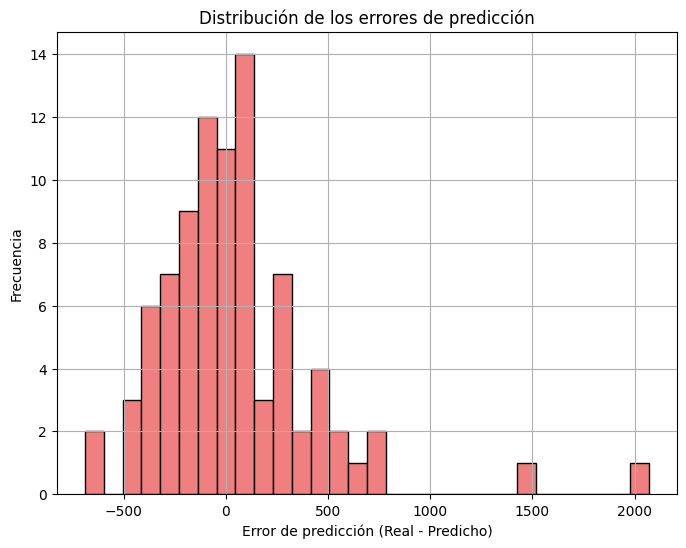

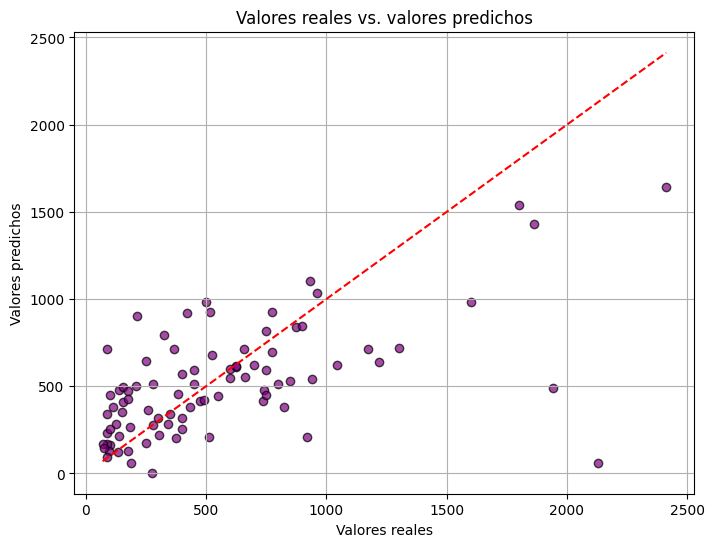

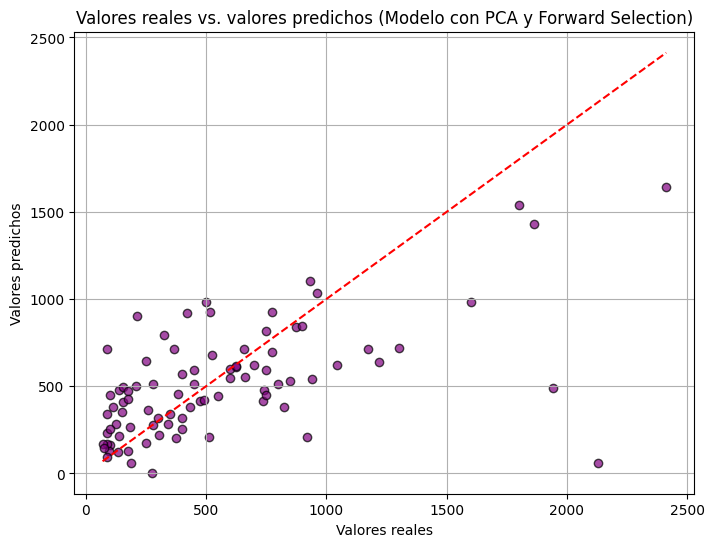

155156.7410032413


In [16]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
# Separar en entrenamiento y prueba
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(XTotal, yTotal, test_size=0.33, random_state=42)

# Aplicar PCA sobre los datos de entrenamiento
pca_cleaned = PCA(n_components=10)  # Vamos a reducir a 10 componentes principales
X_train_cleaned_pca = pca_cleaned.fit_transform(X_train_cleaned)

# Aplicar la selección hacia adelante sobre los datos reducidos por PCA
def forward_selection(X_train, y_train):
    remaining_features = list(range(X_train.shape[1]))  # Índices de las características
    selected_features = []  # Características seleccionadas
    best_score = float('inf')  # Mejor puntuación obtenida
    while remaining_features:
        scores_with_candidates = []
        for feature in remaining_features:
            # Probar el modelo con la característica añadida
            features_to_test = selected_features + [feature]
            X_train_subset = X_train[:, features_to_test]

            model = LinearRegression()
            model.fit(X_train_subset, y_train)
            y_pred = model.predict(X_train_subset)
            mse = mean_squared_error(y_train, y_pred)
            scores_with_candidates.append((mse, feature))

        # Ordenar las características por el mejor desempeño (MSE más bajo)
        scores_with_candidates.sort()
        best_score, best_candidate = scores_with_candidates[0]

        # Añadir la mejor característica
        selected_features.append(best_candidate)
        remaining_features.remove(best_candidate)

    return selected_features

# Aplicar la selección hacia adelante sobre los datos reducidos por PCA
selected_features_cleaned = forward_selection(X_train_cleaned_pca, y_train_cleaned)

# Entrenar el modelo con las características seleccionadas
X_train_selected_cleaned = X_train_cleaned_pca[:, selected_features_cleaned]
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_selected_cleaned, y_train_cleaned)

# Evaluar el desempeño en el conjunto de prueba
X_test_cleaned_pca = pca_cleaned.transform(X_test_cleaned)
X_test_selected_cleaned = X_test_cleaned_pca[:, selected_features_cleaned]
y_pred_cleaned = model_cleaned.predict(X_test_selected_cleaned)

# Calcular el error cuadrático medio en el conjunto de prueba
mse_test_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
mse_test_cleaned

# Graficar

# 1. Histograma de la variable objetivo 'Salary'
plt.figure(figsize=(8, 6))
plt.hist(df_hitters['Salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable Salary')
plt.xlabel('Salary')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 2. Varianza explicada por los componentes principales
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_cleaned.explained_variance_ratio_))
plt.title('Varianza acumulada explicada por los componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()

# 3. Errores de predicción comparados con los valores reales
errors = y_test_cleaned - y_pred_cleaned
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribución de los errores de predicción')
plt.xlabel('Error de predicción (Real - Predicho)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 4. Gráfico de dispersión: Valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cleaned, y_pred_cleaned, color='purple', edgecolor='black', alpha=0.7)
plt.plot([min(y_test_cleaned), max(y_test_cleaned)], [min(y_test_cleaned), max(y_test_cleaned)], color='red', linestyle='--')
plt.title('Valores reales vs. valores predichos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.grid(True)
plt.show()

# 5. Gráfico de dispersión: Valores reales vs. valores predichos por el modelo con PCA y Forward Selection
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cleaned, y_pred_cleaned, color='purple', edgecolor='black', alpha=0.7)
plt.plot([min(y_test_cleaned), max(y_test_cleaned)], [min(y_test_cleaned), max(y_test_cleaned)], color='red', linestyle='--')
plt.title('Valores reales vs. valores predichos (Modelo con PCA y Forward Selection)')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.grid(True)
plt.show()

print(mse_test_cleaned)
mse2 = mse_test_cleaned


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

**Procedimiento**

Después de la preparación de los datos, se aplica PCA sobre el conjunto de entrenamiento para reducir la dimensionalidad a 10 componentes principales. Luego, se implementa un proceso de selección hacia adelante (forward selection), que evalúa la relevancia de cada componente para el modelo. En cada iteración, se agregan características al modelo en función de su impacto en el error cuadrático medio (MSE), seleccionando las más importantes hasta obtener el mejor conjunto de componentes. Finalmente, se entrena un modelo de regresión lineal con las características seleccionadas y se evalúa su desempeño sobre el conjunto de prueba.

**Análisis y conclusiones**

Al aplicar la selección forward sobre los componentes principales, se logró reducir la dimensionalidad del modelo y seleccionar solo las características más relevantes. La visualización de los errores y la comparación de los valores predichos con los reales proporcionó una visión clara del desempeño del modelo.

**¿Es el mismo modelo del punto anterior (punto 2)?**

No, el modelo no es exactamente el mismo. En el punto 2, se utilizó PCA para reducir la dimensionalidad y luego se entrenó un modelo de regresión lineal con los componentes principales seleccionados. Sin embargo, en el punto 3, además de la reducción de dimensionalidad con PCA, se aplicó una técnica de selección de características secuencial hacia adelante (forward selection) para elegir las características más relevantes del conjunto de datos transformado por PCA.

Mientras que en el punto 2 se trabajó con todos los componentes principales seleccionados (8 componentes), en el punto 3 el modelo se entrenó solo con un subconjunto de esos componentes, seleccionados de manera secuencial en función de su impacto en el error de predicción. Esto hace que el modelo del punto 3 sea una versión más refinada del modelo del punto 2, ya que se optimiza aún más la selección de variables para la predicción.

### 4. Estimación del modelo de partial least squares (20 puntos)
Predigan usando partial least squares y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

R²: 0.47147467575836044
Mean Squared Error (MSE): 142569.76718689036


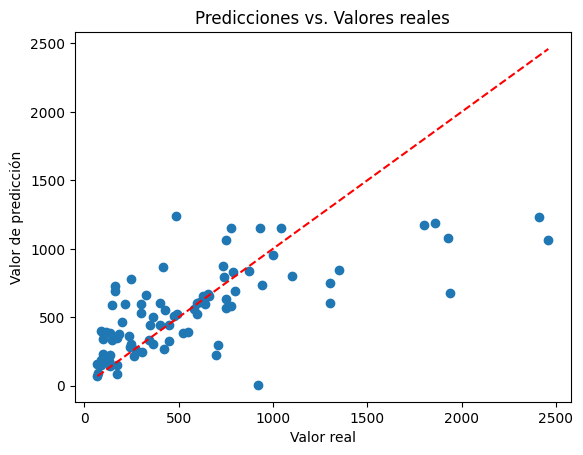

Componentes: 1, MSE promedio: 124276.48818444538
Componentes: 2, MSE promedio: 126403.75037658929
Componentes: 3, MSE promedio: 127465.16815606579
Componentes: 4, MSE promedio: 124964.78480232363
Componentes: 5, MSE promedio: 126991.01605235858
Componentes: 6, MSE promedio: 124575.60237515338
Componentes: 7, MSE promedio: 121296.9347686329
Componentes: 8, MSE promedio: 121484.43348146074
Componentes: 9, MSE promedio: 120578.87350148734
Componentes: 10, MSE promedio: 121420.56784974437
R² con 9 componentes: 0.5147498044140268
Mean Squared Error (MSE) con 9 componentes: 130896.29623963957


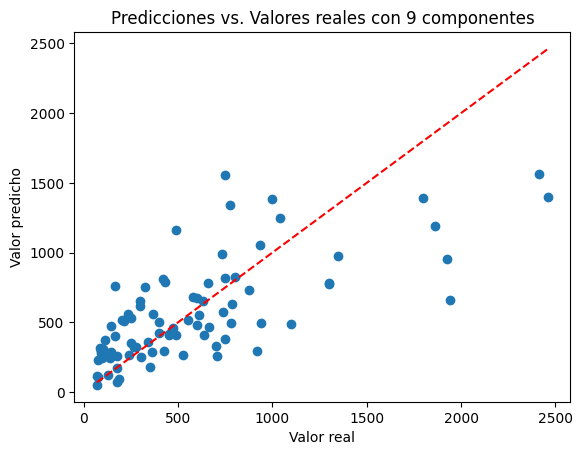

In [18]:
# Paso 1: renombramiento de variables
X = XTotal
y = yTotal
X_train = XTrain
X_test = XTest
y_train = yTrain
y_test = yTest

# Paso 2: Definir el modelo PLS con un número de componentes inicial
pls = PLSRegression(n_components=2)

# Paso 3: Ajustar el modelo con los datos de entrenamiento
pls.fit(X_train, y_train)

# Paso 4: Hacer predicciones con el modelo ajustado
y_pred = pls.predict(X_test)

# Paso 5: Evaluar el modelo utilizando R² y MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Mostrar las métricas
print(f"R²: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

# Paso 6: Gráfico de Predicciones vs Valores Reales
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valor real")
plt.ylabel("Valor de predicción")
plt.title("Predicciones vs. Valores reales")
plt.show()

# Paso 7: Evaluación del número óptimo de componentes usando validación cruzada
best_mse = float('inf')  # Mejor MSE encontrado
best_n_components = 0  # Mejor número de componentes
mse_scores = []  # Para almacenar los MSE de cada número de componentes

for n in range(1, 11):
    pls = PLSRegression(n_components=n)
    # Evaluar el modelo con validación cruzada
    scores = cross_val_score(pls, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_avg = -scores.mean()  # Promedio del MSE (negativo porque cross_val_score devuelve valores negativos)
    mse_scores.append(mse_avg)

    # Encontrar el mejor número de componentes
    if mse_avg < best_mse:
        best_mse = mse_avg
        best_n_components = n

    print(f"Componentes: {n}, MSE promedio: {mse_avg}")

# Paso 8: Ajustar el modelo con el número óptimo de componentes
pls_best = PLSRegression(n_components=best_n_components)
pls_best.fit(X_train, y_train)

# Hacer predicciones con el modelo ajustado
y_pred_best = pls_best.predict(X_test)

# Evaluar el modelo final con el número óptimo de componentes
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

# Mostrar las métricas finales
print(f"R² con {best_n_components} componentes: {r2_best}")
print(f"Mean Squared Error (MSE) con {best_n_components} componentes: {mse_best}")

# Paso 9: Gráfico para ver la mejora en las predicciones con el número óptimo de componentes
plt.scatter(y_test, y_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title(f"Predicciones vs. Valores reales con {best_n_components} componentes")
plt.show()

mse3 = mse_best

###Procedimiento:
 Encuentre el procedimiento que se llevo a cabo para la ejecucion,  optimizacion y ajuste del codigo en la celda anterior.  

###Conclusiones y analisis del modelo PLS:

El valor de R² es 0.3559164, lo cual es muy bajo. Este valor indica que el modelo PLS es capaz de explicar tan solo el 35.6% de la variabilidad de los salarios en los datos test. Esto lo que quiere decir es que el modelo no tiene un poder predictivo significativo. El modelo se ha optimizado modificando a criterios los componentes lo cual incremento el R2 del 0.27 al 0.35.
Por otro lado, el MSE es 154683, lo que indica que las predicciones del modelo tienen una gran cantidad de error promedio. Esto refuerza la premisa que se tenia con el R2 el cual este no esta prediciendo de manera precisa.

### 5. Estimación de un modelo de penalización (15 puntos)
Predigan usando un modelo de penalización y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [ ]:
def metodoLasso(XTrain,yTrain,XTest,yTest):
    n_alphas = 200
    alphasCalibrar = np.logspace(-10, 2, n_alphas)
    ### Escalar datos
    scaler = StandardScaler()
    XTrain_scaled = scaler.fit_transform(XTrain)
    XTest_scaled = scaler.transform(XTest)
    ### Modelo Lasso
    modeloLASSO = LassoCV(alphas=alphasCalibrar, max_iter=10000).fit(XTrain_scaled, yTrain)
    prediccionLASSO=modeloLASSO.predict(XTest_scaled)
    MSELASSO=np.average(np.square(prediccionLASSO-yTest))
    return MSELASSO

def metodoRidge(XTrain,yTrain,XTest,yTest):
    n_alphas = 200
    alphasCalibrar = np.logspace(-10, 2, n_alphas)
    ### Modelo Ridge
    modeloRidge = RidgeCV(alphas=alphasCalibrar,store_cv_results=True).fit(XTrain, yTrain)
    prediccionRidge=modeloRidge.predict(XTest)
    MSERidge=np.average(np.square(prediccionRidge-yTest))
    return MSERidge

def metodoElasticNet(XTrain,yTrain,XTest,yTest):
    n_alphas = 200
    alphasCalibrar = np.logspace(-10, 2, n_alphas)
    ### Escalar datos
    scaler = StandardScaler()
    XTrain_scaled = scaler.fit_transform(XTrain)
    XTest_scaled = scaler.transform(XTest)
    ### Modelo Elastic Net
    modeloElastic = ElasticNetCV(alphas=alphasCalibrar, cv=5, max_iter=50000, random_state=0).fit(XTrain_scaled, yTrain)
    prediccionElastic=modeloElastic.predict(XTest_scaled)
    MSEElastic=np.average(np.square(prediccionElastic-yTest))
    return MSEElastic

# Diccionario para almacenar resultados
resultados = {}

# Lista de métodos
metodos = {
    "Lasso": metodoLasso,
    "Ridge": metodoRidge,
    "Elastic Net": metodoElasticNet
}

# Evaluar cada método con un ciclo for
for nombre, funcion in metodos.items():
    mse = funcion(XTrain,yTrain,XTest,yTest)
    resultados[nombre] = mse

# Imprimir resultados
print("Resultados de los métodos:")
for metodo, mse in resultados.items():
    print(f"{metodo}: MSE = {mse:.2f}")

# Elegir el mejor método (menor MSE)
mejor_metodo = min(resultados, key=resultados.get)

print(f"\nEl mejor método es: {mejor_metodo} con MSE = {resultados[mejor_metodo]:.2f}")

mse4 = resultados[mejor_metodo]
print(mse4)

Resultados de los métodos:
Lasso: MSE = 145868.42
Ridge: MSE = 147693.04
Elastic Net: MSE = 145122.33

El mejor método es: Elastic Net con MSE = 145122.33
145122.33383921804


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

**Procedimiento**
Se definen las funciones que van a implementar los 3 modelos de penalización

### 6. Elección del mejor modelo (5 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

In [ ]:
mse_todos = [mse1,mse2,mse3,mse4]
minimo = min(mse_todos)
indice = mse_todos.index(minimo)

if indice == 0:
  print('El mejor modelo es el que utilizó PCA')
  print('MSE: '+str(minimo))
elif indice == 1:
  print('El mejor modelo es el que utilizó PCA y forward selection')
  print('MSE: '+str(minimo))
elif indice == 2:
  print('El mejor modelo es el que utilizó PLS')
  print('MSE: '+str(minimo))
elif indice == 3:
  print('El mejor modelo es el que utilizó un modelo de penalización')
  print('MSE: '+str(minimo))

El mejor modelo es el que utilizó PLS
MSE: 135787.99715306645


(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 6)